In [1190]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random

In [ ]:
CHARGER_SPEEDS = np.array([40,50,72,150,250])

VEHICLE_MODELS = {
    1: {
        'Model': 'S',
        'Capacity': 55,
        'Efficiency': 0.17,
        'Share': 0.6
    },
    2: {
        'Model': 'M',
        'Capacity': 75,
        'Efficiency': 0.18,
        'Share': 0.2
    },
    3: {
        'Model': 'L',
        'Capacity': 95,
        'Efficiency': 0.19,
        'Share': 0.15
    },
    4: {
        'Model': 'XL',
        'Capacity': 120,
        'Efficiency': 0.20,
        'Share': 0.5
    }
}

[2, 2, 3, 1, 3, 3, 4, 1, 3, 3, 2, 3, 4, 2, 4, 4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 1, 3, 4]


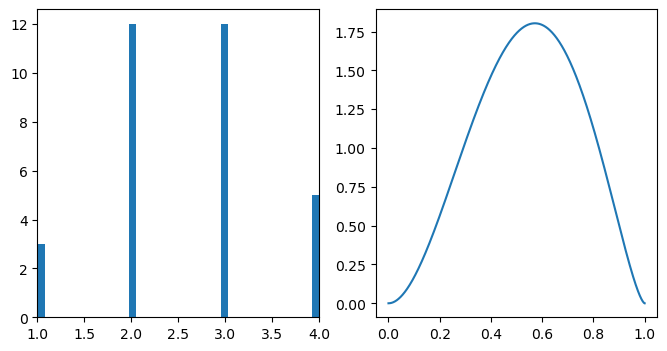

In [1347]:
# data = np.array([40,50,72,150,250]) # charger speed
# data = np.array([4,6,8,10,12,14,16]) # chargers per station
data = np.array([1,2,3,4]) # vehicle models

num_samples = 32

a = 3
b = 2.5
# 30,30 is normal but too narrow.
# 3.5,2 feels right for charger_speed and chargers_per_station .. range from 2,2 to 4,2
# 3,3.5 feels right for vehicle models .. range from 3,3.5 to 3,2.5


# get samples from beta dist
samples = stats.beta.rvs(a, b, size=num_samples)

# category breakpoints for beta dist interval [0,1]
breaks = [b + 1/len(data) for b in np.arange(0,1,1/len(data))]

# categorize
samples_cat = [next(i for i, val in enumerate(breaks) if sample <= val) for sample in samples]

# map to data values
samples_map = [data[c] for c in samples_cat]


# qa
x = np.linspace(0,1,1000)
y = stats.beta.pdf(x,a,b)

fig, axs = plt.subplots(1,2,figsize=(8, 4))
axs[0].hist(samples_map, bins=len(data)*10)
axs[0].set_xlim(min(data), max(data))
axs[1].plot(x, y)

print(samples_map)

In [1038]:
# this preserves the dist

data = [1,2,3,4]
num_samples = 10
a=3
b=3

# get samples from beta dist
samples = stats.beta.rvs(a, b, size=num_samples)

# category breakpoints for beta dist interval [0,1]
breaks = [b + 1/len(data) for b in np.arange(0,1,1/len(data))]

# categorize
samples_cat = [next(i for i, val in enumerate(breaks) if sample <= val) for sample in samples]

# map to data values
samples_map = [data[c] for c in samples_cat]

samples_map

[2, 4, 1, 3, 3, 2, 1, 3, 2, 2]

In [999]:
final = pd.DataFrame([samples, samples_cat, samples_map]).transpose()
final.columns = ['samples','samples_cat','samples_map']

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
        2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
        3.6, 3.7, 3.8, 3.9, 4. ]),
 <BarContainer object of 30 artists>)

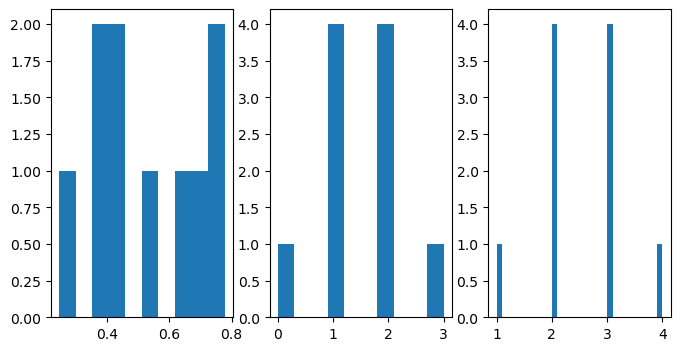

In [1000]:
fig, axs = plt.subplots(1,3,figsize=(8, 4))
axs[0].hist(final['samples'])
axs[1].hist(final['samples_cat'], bins=10)
axs[2].hist(final['samples_map'], bins=30)

In [997]:
def generate_discrete_beta_samples(data, num_samples=1, a=3.5, b=2):

  # get samples from beta dist
  samples = stats.beta.rvs(a, b, size=num_samples)
  
  # category breakpoints for beta dist interval [0,1]
  breaks = [b + 1/len(data) for b in np.arange(0,1,1/len(data))]
  
  # categorize
  samples_cat = [next(i for i, val in enumerate(breaks) if sample <= val) for sample in samples]
  
  # map to data values
  samples_map = [data[c] for c in samples_cat]

  return samples_map

(array([103.,   0.,   0., 390.,   0.,   0., 414.,   0.,   0.,  93.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

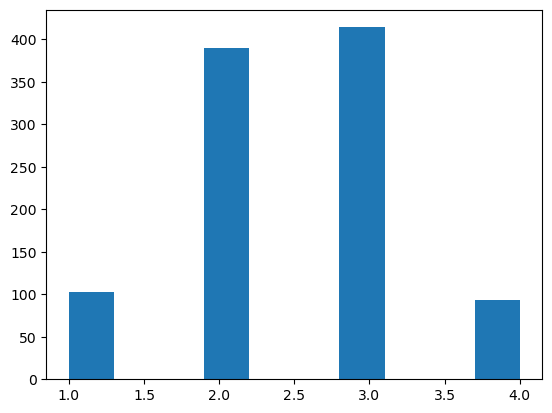

In [1047]:
plt.hist(generate_discrete_beta_samples([1,2,3,4],1000,3,3))

(array([121., 286.,   0.,   0.,   0., 370.,   0.,   0.,   0., 223.]),
 array([ 40.,  61.,  82., 103., 124., 145., 166., 187., 208., 229., 250.]),
 <BarContainer object of 10 artists>)

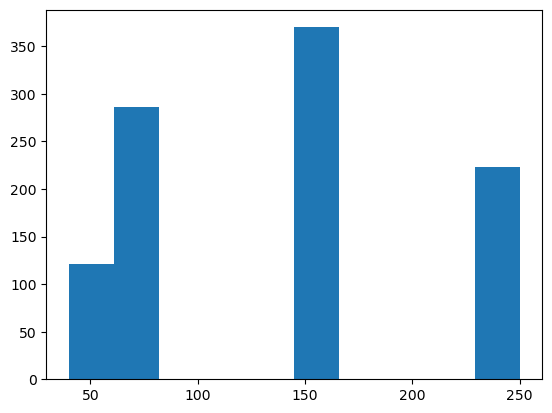

In [969]:
plt.hist(generate_discrete_beta_samples([40,50,72,150,250],1000))

In [1260]:
def generate_vehicle(a=3, b=3):
  data = list(VEHICLE_MODELS.keys())
  vehicle_key = generate_discrete_beta_samples(data,1,a,b)[0]
  vehicle = VEHICLE_MODELS[vehicle_key]

  model = vehicle['Model']
  battery_capacity = vehicle['Capacity']
  efficiency = vehicle['Efficiency']
  battery_level = round(random.uniform(0.6, 1) * battery_capacity,1) # random starting charge level 60-100%
  return(model, battery_capacity, efficiency, battery_level)
    

In [1264]:
generate_vehicle()

('M', 75, 0.18, 59.7)

(array([ 79.,   0.,   0., 413.,   0.,   0., 410.,   0.,   0.,  98.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

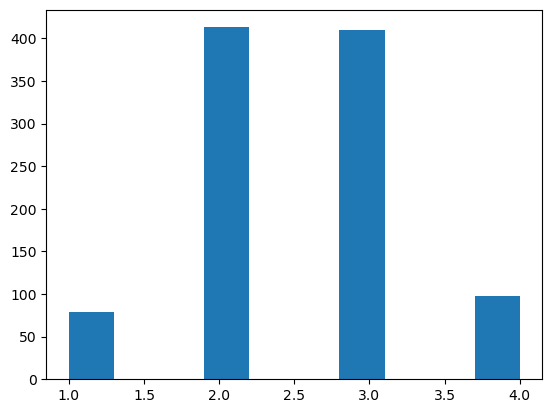

In [1294]:
data = list(VEHICLE_MODELS.keys())
plt.hist(generate_discrete_beta_samples(data, num_samples=1000, a=3, b=3))

In [ ]:
## Testing


In [1350]:
for alpha in np.arange(4,2,-.10):
  print(alpha)

4.0
3.9
3.8
3.6999999999999997
3.5999999999999996
3.4999999999999996
3.3999999999999995
3.2999999999999994
3.1999999999999993
3.099999999999999
2.999999999999999
2.899999999999999
2.799999999999999
2.699999999999999
2.5999999999999988
2.4999999999999987
2.3999999999999986
2.2999999999999985
2.1999999999999984
2.0999999999999983
